In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 4
2023-07-04 16:30:07.886114


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1081.1321)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.0749)tensor(4.2191)tensor(6.6450)tensor(4.4732)tensor(5.2294)tensor(3.0717)tensor(3.4687)tensor(5.0354)tensor(3.3915)tensor(4.2094)tensor(3.3462)tensor(8.4441)tensor(10.2086)tensor(4.6070)tensor(2.2849)tensor(7.3639)tensor(5.6323)tensor(4.8189)tensor(3.9510)tensor(3.8149)tensor(4.2331)tensor(5.7171)tensor(4.1692)tensor(4.1785)tensor(5.2459)tensor(6.6206)tensor(4.8217)tensor(3.5658)tensor(6.0398)tensor(4.8066)tensor(3.4239)tensor(3.4989)tensor(9.1263)tensor(7.1858)tensor(5.1053)tensor(5.8273)tensor(4.6962)tensor(5.9501)tensor(6.3944)tensor(8.0719)tensor(6.5106)tensor(4.6100)tensor(3.7762)tensor(2.6733)tensor(7.3385)tensor(6.0211)tensor(5.0876)tensor(6.8950)tensor(3.6046)tensor(4.9718)tensor(5.0955)tensor(4.6015)tensor(3.2734)tensor(3.0836)tensor(14.1314)tensor(9.1239)tensor(3.2903)tensor(4.0271)tensor(4.9686)tensor(3.9934)tensor(3.6719)tensor(7.3993)tensor(3.3197)tensor(4.3902)tensor(3.8335)tensor(4.9446)tensor(3.6172)tensor(6.0342)tensor(7.2079)tensor(6.4526)tensor(3.4192)tens

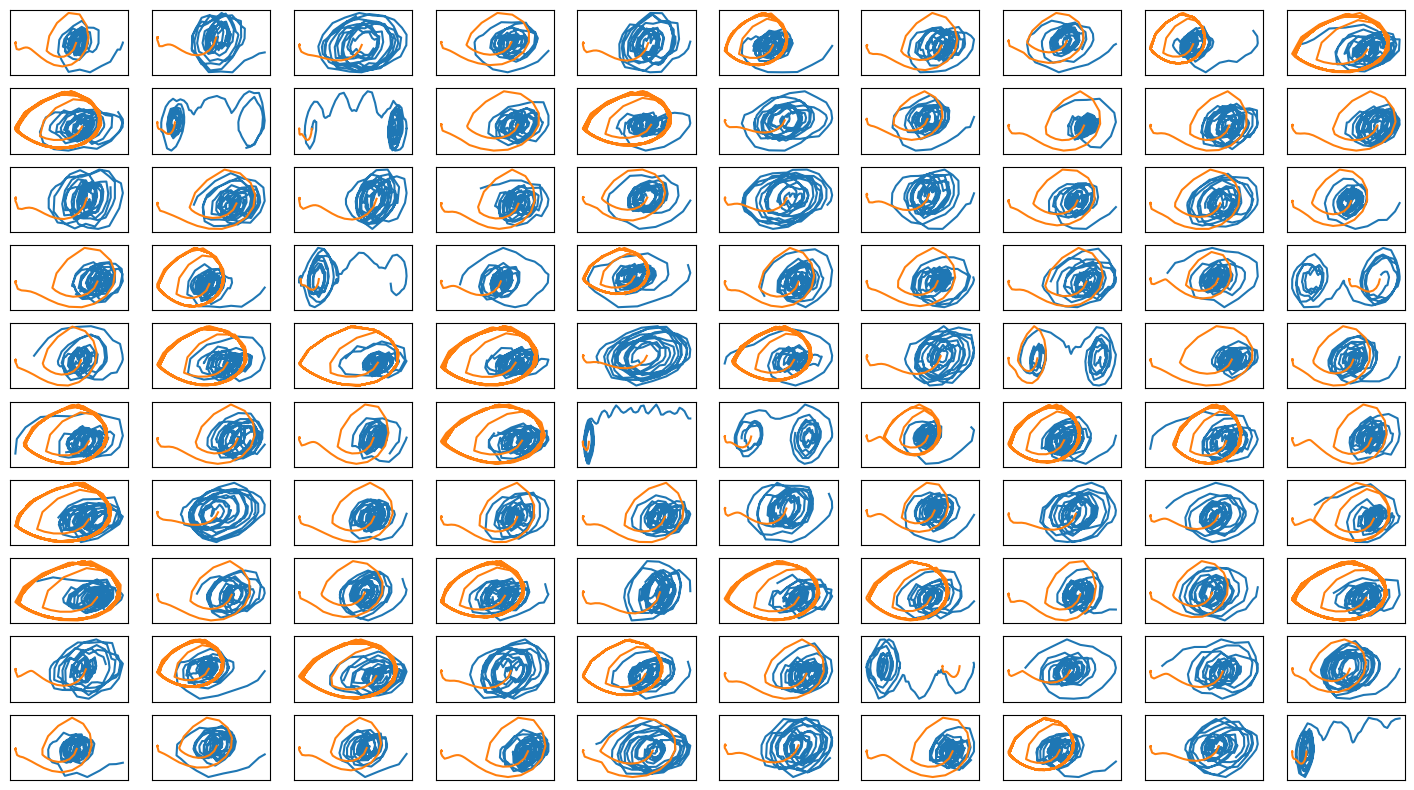

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 5516.02252  validloss 791.89467±0.00000  bestvalidloss 791.89467  last_update 0
train: iter 1  trainloss 1377.71175  validloss 630.71658±0.00000  bestvalidloss 630.71658  last_update 0
train: iter 2  trainloss 640.44351  validloss 493.25274±0.00000  bestvalidloss 493.25274  last_update 0
train: iter 3  trainloss 530.84946  validloss 461.25053±0.00000  bestvalidloss 461.25053  last_update 0
train: iter 4  trainloss 512.15592  validloss 430.14326±0.00000  bestvalidloss 430.14326  last_update 0
train: iter 5  trainloss 431.23671  validloss 405.53645±0.00000  bestvalidloss 405.53645  last_update 0
train: iter 6  trainloss 368.12459  validloss 378.57115±0.00000  bestvalidloss 378.57115  last_update 0
train: iter 7  trainloss 284.52656  validloss 355.76529±0.00000  bestvalidloss 355.76529  last_update 0
train: iter 8  trainloss 221.60268  validloss 308.16265±0.00000  bestvalidloss 308.16265  last_update 0
train: iter 9  trainloss 119.94020  validlo

train: iter 77  trainloss -579.95727  validloss -536.54115±0.00000  bestvalidloss -540.89156  last_update 3
train: iter 78  trainloss -568.92712  validloss -545.68729±0.00000  bestvalidloss -545.68729  last_update 0
train: iter 79  trainloss -595.77197  validloss -536.26961±0.00000  bestvalidloss -545.68729  last_update 1
train: iter 80  trainloss -586.30773  validloss -516.96121±0.00000  bestvalidloss -545.68729  last_update 2
train: iter 81  trainloss -598.88444  validloss -533.96467±0.00000  bestvalidloss -545.68729  last_update 3
train: iter 82  trainloss -612.80905  validloss -537.37026±0.00000  bestvalidloss -545.68729  last_update 4
train: iter 83  trainloss -599.76821  validloss -512.07103±0.00000  bestvalidloss -545.68729  last_update 5
train: iter 84  trainloss -609.84396  validloss -533.87760±0.00000  bestvalidloss -545.68729  last_update 6
train: iter 85  trainloss -599.02523  validloss -485.53140±0.00000  bestvalidloss -545.68729  last_update 7
train: iter 86  trainloss -6

train: iter 153  trainloss -557.51983  validloss -486.87336±0.00000  bestvalidloss -610.54547  last_update 10
train: iter 154  trainloss -635.81108  validloss -427.51527±0.00000  bestvalidloss -610.54547  last_update 11
train: iter 155  trainloss -654.85011  validloss -523.74994±0.00000  bestvalidloss -610.54547  last_update 12
train: iter 156  trainloss -634.47149  validloss -614.03403±0.00000  bestvalidloss -614.03403  last_update 0
train: iter 157  trainloss -597.80440  validloss -560.38733±0.00000  bestvalidloss -614.03403  last_update 1
train: iter 158  trainloss -642.90134  validloss 1838.74347±0.00000  bestvalidloss -614.03403  last_update 2
train: iter 159  trainloss -642.43234  validloss -456.49318±0.00000  bestvalidloss -614.03403  last_update 3
train: iter 160  trainloss -647.20926  validloss 992.95147±0.00000  bestvalidloss -614.03403  last_update 4
train: iter 161  trainloss -608.46260  validloss -44.38808±0.00000  bestvalidloss -614.03403  last_update 5
train: iter 162  t

train: iter 228  trainloss -664.28854  validloss -624.31108±0.00000  bestvalidloss -624.31108  last_update 0
train: iter 229  trainloss -645.38966  validloss -504.94635±0.00000  bestvalidloss -624.31108  last_update 1
train: iter 230  trainloss -682.80113  validloss -453.41212±0.00000  bestvalidloss -624.31108  last_update 2
train: iter 231  trainloss -680.06536  validloss -582.64717±0.00000  bestvalidloss -624.31108  last_update 3
train: iter 232  trainloss -674.64936  validloss -193.02109±0.00000  bestvalidloss -624.31108  last_update 4
train: iter 233  trainloss -670.71778  validloss -519.90622±0.00000  bestvalidloss -624.31108  last_update 5
train: iter 234  trainloss -675.34878  validloss -437.06691±0.00000  bestvalidloss -624.31108  last_update 6
train: iter 235  trainloss -675.84104  validloss -532.88574±0.00000  bestvalidloss -624.31108  last_update 7
train: iter 236  trainloss -676.23106  validloss -598.66807±0.00000  bestvalidloss -624.31108  last_update 8
train: iter 237  tr

train: iter 303  trainloss -685.57566  validloss -661.17089±0.00000  bestvalidloss -674.23064  last_update 6
train: iter 304  trainloss -659.28609  validloss -670.05708±0.00000  bestvalidloss -674.23064  last_update 7
train: iter 305  trainloss -684.47711  validloss -645.76942±0.00000  bestvalidloss -674.23064  last_update 8
train: iter 306  trainloss -684.17686  validloss -659.41820±0.00000  bestvalidloss -674.23064  last_update 9
train: iter 307  trainloss -696.23356  validloss -680.44379±0.00000  bestvalidloss -680.44379  last_update 0
train: iter 308  trainloss -657.80223  validloss -677.43566±0.00000  bestvalidloss -680.44379  last_update 1
train: iter 309  trainloss -693.86265  validloss -577.99443±0.00000  bestvalidloss -680.44379  last_update 2
train: iter 310  trainloss -674.56258  validloss -663.88915±0.00000  bestvalidloss -680.44379  last_update 3
train: iter 311  trainloss -679.03702  validloss -513.95770±0.00000  bestvalidloss -680.44379  last_update 4
train: iter 312  tr

train: iter 378  trainloss -680.85771  validloss -661.71932±0.00000  bestvalidloss -696.51703  last_update 16
train: iter 379  trainloss -696.76172  validloss -641.78884±0.00000  bestvalidloss -696.51703  last_update 17
train: iter 380  trainloss -603.00034  validloss -435.83638±0.00000  bestvalidloss -696.51703  last_update 18
train: iter 381  trainloss -682.19024  validloss -623.01079±0.00000  bestvalidloss -696.51703  last_update 19
train: iter 382  trainloss -698.45043  validloss -629.75376±0.00000  bestvalidloss -696.51703  last_update 20
train: iter 383  trainloss -681.72312  validloss -663.73200±0.00000  bestvalidloss -696.51703  last_update 21
train: iter 384  trainloss -708.75180  validloss -640.03761±0.00000  bestvalidloss -696.51703  last_update 22
train: iter 385  trainloss -704.72537  validloss -653.49472±0.00000  bestvalidloss -696.51703  last_update 23
train: iter 386  trainloss -699.09541  validloss -694.99801±0.00000  bestvalidloss -696.51703  last_update 24
train: ite

train: iter 453  trainloss -735.64115  validloss -700.13485±0.00000  bestvalidloss -700.13485  last_update 0
train: iter 454  trainloss -703.91839  validloss -684.36756±0.00000  bestvalidloss -700.13485  last_update 1
train: iter 455  trainloss -743.18023  validloss -635.63337±0.00000  bestvalidloss -700.13485  last_update 2
train: iter 456  trainloss -717.18977  validloss -607.64404±0.00000  bestvalidloss -700.13485  last_update 3
train: iter 457  trainloss -739.97763  validloss -685.33100±0.00000  bestvalidloss -700.13485  last_update 4
train: iter 458  trainloss -724.64417  validloss -641.26928±0.00000  bestvalidloss -700.13485  last_update 5
train: iter 459  trainloss -661.77117  validloss -669.02189±0.00000  bestvalidloss -700.13485  last_update 6
train: iter 460  trainloss -721.97732  validloss -591.42244±0.00000  bestvalidloss -700.13485  last_update 7
train: iter 461  trainloss -734.55548  validloss -667.59939±0.00000  bestvalidloss -700.13485  last_update 8
train: iter 462  tr

train: iter 528  trainloss -754.73426  validloss -717.17682±0.00000  bestvalidloss -732.46939  last_update 22
train: iter 529  trainloss -748.43735  validloss -712.77589±0.00000  bestvalidloss -732.46939  last_update 23
train: iter 530  trainloss -761.48163  validloss -726.70532±0.00000  bestvalidloss -732.46939  last_update 24
train: iter 531  trainloss -744.84735  validloss -683.94618±0.00000  bestvalidloss -732.46939  last_update 25
train: iter 532  trainloss -733.57780  validloss -637.10840±0.00000  bestvalidloss -732.46939  last_update 26
train: iter 533  trainloss -740.33713  validloss -697.41585±0.00000  bestvalidloss -732.46939  last_update 27
train: iter 534  trainloss -738.69478  validloss -635.73256±0.00000  bestvalidloss -732.46939  last_update 28
train: iter 535  trainloss -748.05226  validloss -703.33161±0.00000  bestvalidloss -732.46939  last_update 29
train: iter 536  trainloss -740.61146  validloss -689.61128±0.00000  bestvalidloss -732.46939  last_update 30
train: ite

train: iter 603  trainloss -740.08355  validloss -693.03836±0.00000  bestvalidloss -737.97974  last_update 22
train: iter 604  trainloss -761.35812  validloss -692.54748±0.00000  bestvalidloss -737.97974  last_update 23
train: iter 605  trainloss -765.31264  validloss -708.06406±0.00000  bestvalidloss -737.97974  last_update 24
train: iter 606  trainloss -754.77876  validloss -737.77436±0.00000  bestvalidloss -737.97974  last_update 25
train: iter 607  trainloss -746.62612  validloss -734.86793±0.00000  bestvalidloss -737.97974  last_update 26
train: iter 608  trainloss -758.63954  validloss -688.80924±0.00000  bestvalidloss -737.97974  last_update 27
train: iter 609  trainloss -770.77620  validloss -695.97443±0.00000  bestvalidloss -737.97974  last_update 28
train: iter 610  trainloss -732.36026  validloss -739.72238±0.00000  bestvalidloss -739.72238  last_update 0
train: iter 611  trainloss -716.55872  validloss -714.44260±0.00000  bestvalidloss -739.72238  last_update 1
train: iter 

train: iter 678  trainloss -755.61039  validloss -638.22792±0.00000  bestvalidloss -746.80249  last_update 3
train: iter 679  trainloss -774.26868  validloss -724.56138±0.00000  bestvalidloss -746.80249  last_update 4
train: iter 680  trainloss -778.02061  validloss -714.76280±0.00000  bestvalidloss -746.80249  last_update 5
train: iter 681  trainloss -752.64248  validloss -693.85491±0.00000  bestvalidloss -746.80249  last_update 6
train: iter 682  trainloss -763.00017  validloss -718.48607±0.00000  bestvalidloss -746.80249  last_update 7
train: iter 683  trainloss -752.85838  validloss -707.27393±0.00000  bestvalidloss -746.80249  last_update 8
train: iter 684  trainloss -720.07892  validloss -711.68117±0.00000  bestvalidloss -746.80249  last_update 9
train: iter 685  trainloss -769.09863  validloss -720.32063±0.00000  bestvalidloss -746.80249  last_update 10
train: iter 686  trainloss -775.67158  validloss -718.27331±0.00000  bestvalidloss -746.80249  last_update 11
train: iter 687  

train: iter 753  trainloss -773.44029  validloss -668.64811±0.00000  bestvalidloss -746.80249  last_update 78
train: iter 754  trainloss -759.79773  validloss -707.87477±0.00000  bestvalidloss -746.80249  last_update 79
train: iter 755  trainloss -763.48353  validloss -679.28484±0.00000  bestvalidloss -746.80249  last_update 80
train: iter 756  trainloss -779.02910  validloss -718.69111±0.00000  bestvalidloss -746.80249  last_update 81
train: iter 757  trainloss -765.01505  validloss -672.35817±0.00000  bestvalidloss -746.80249  last_update 82
train: iter 758  trainloss -773.09067  validloss -719.27696±0.00000  bestvalidloss -746.80249  last_update 83
train: iter 759  trainloss -769.46900  validloss -731.73233±0.00000  bestvalidloss -746.80249  last_update 84
train: iter 760  trainloss -775.53703  validloss -743.34446±0.00000  bestvalidloss -746.80249  last_update 85
train: iter 761  trainloss -751.50754  validloss -738.39777±0.00000  bestvalidloss -746.80249  last_update 86
train: ite

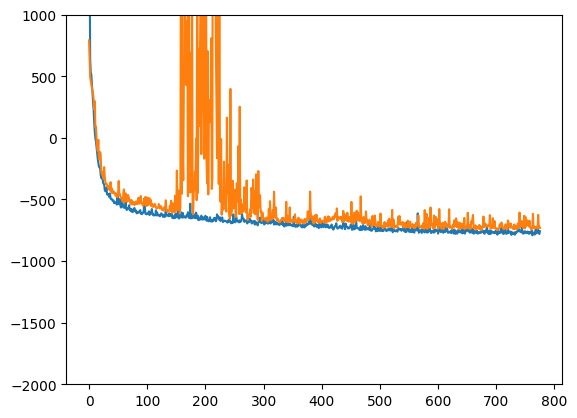

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


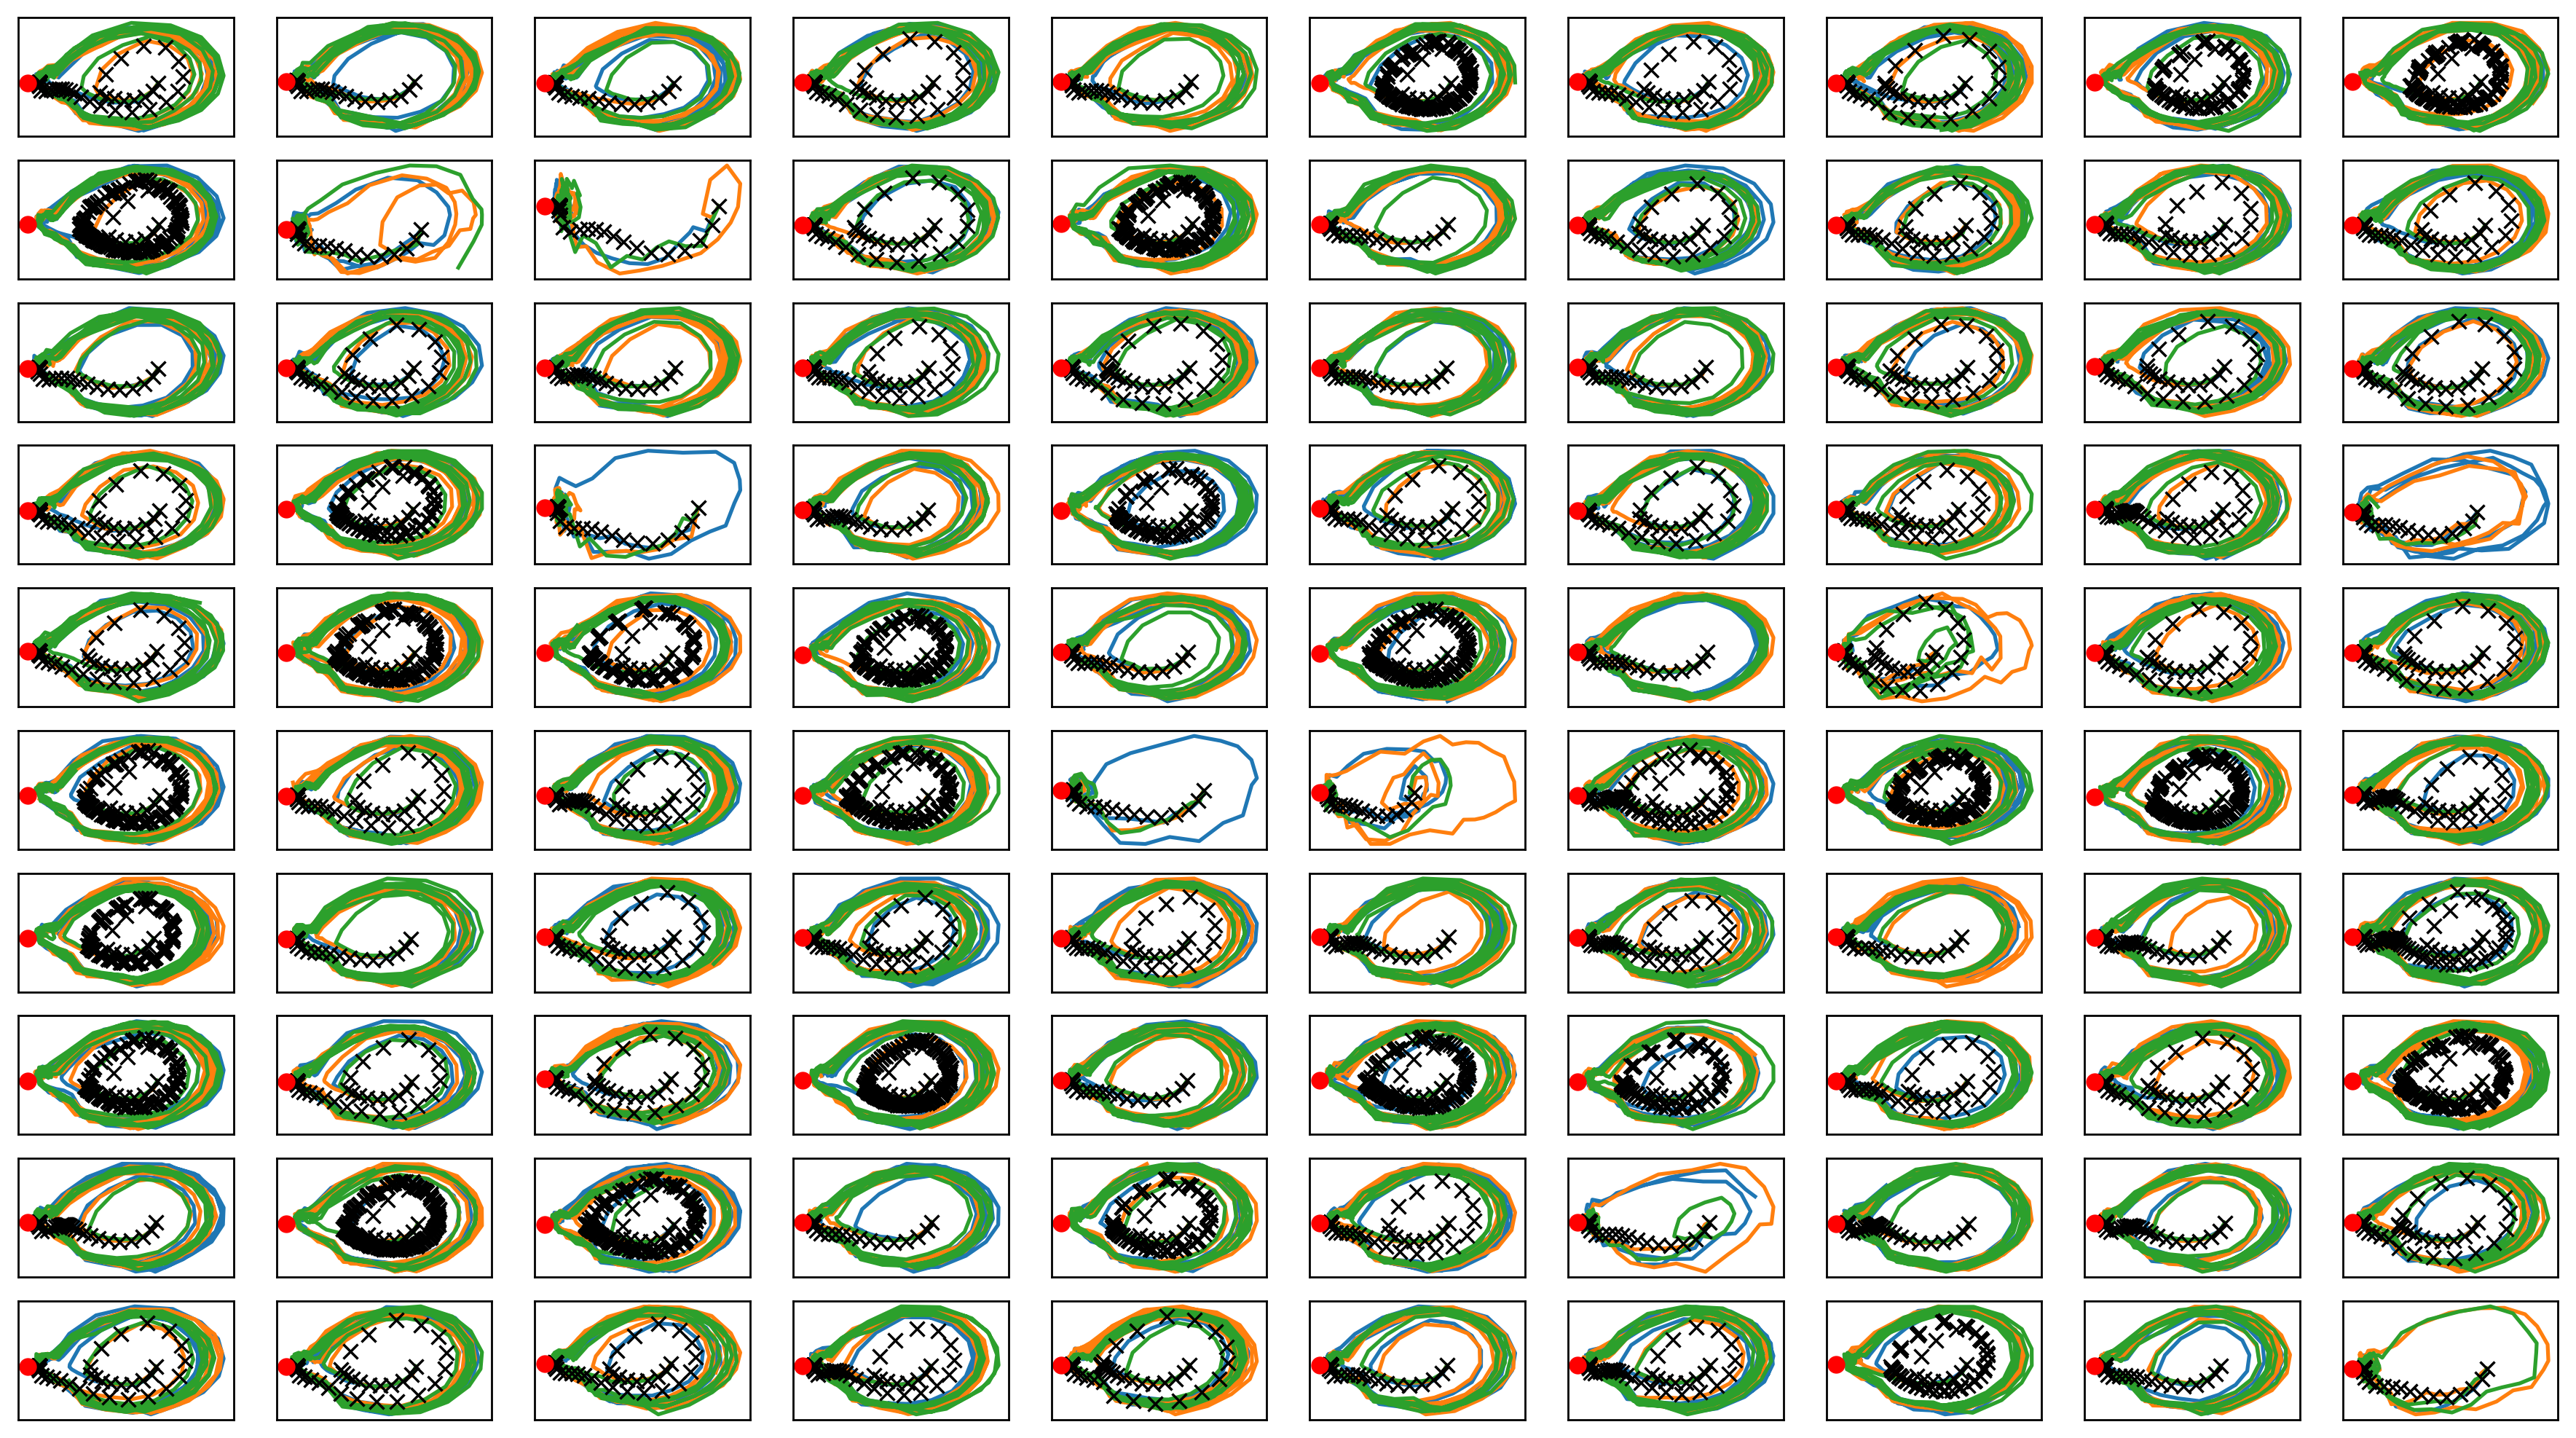

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

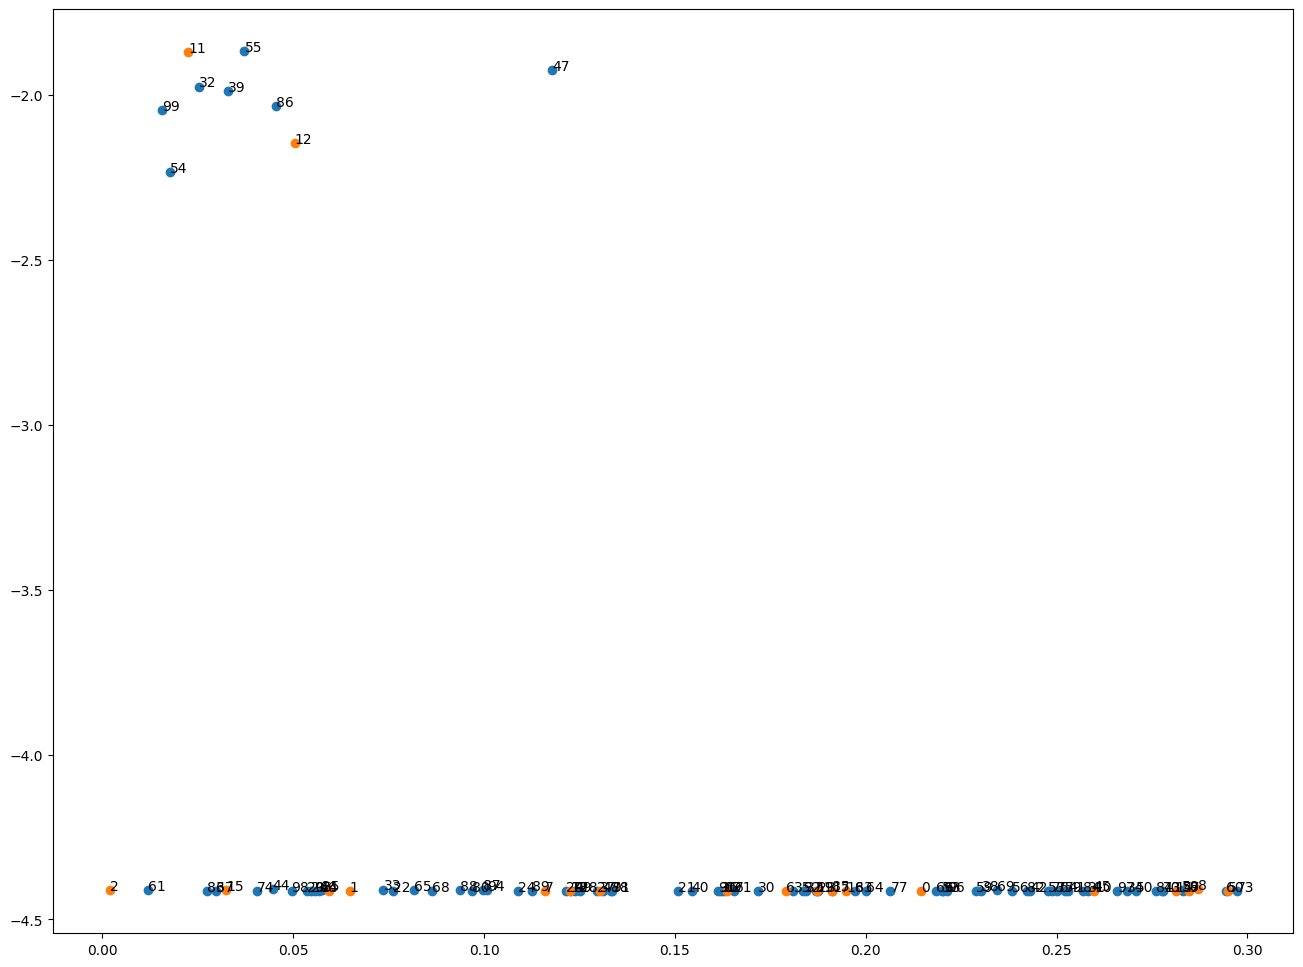

[0.2144448  0.06482685 0.00186908 0.13043746 0.05930552 0.2950202
 0.17920018 0.11597138 0.28699589 0.28469319 0.25988679 0.02248458
 0.05039166 0.12253316 0.28127148 0.03245801 0.1635608  0.19128307
 0.19494153 0.18717483 0.05369217 0.15075992 0.07610389 0.18747925
 0.10885608 0.05743392 0.05473362 0.12954662 0.12503289 0.12144757
 0.17164163 0.25830429 0.02539848 0.07363611 0.26839539 0.18106905
 0.16202242 0.18436885 0.23032741 0.03294544 0.15439611 0.2531121
 0.24304333 0.27801621 0.04461805 0.25973247 0.05670773 0.11783435
 0.13102989 0.12374166 0.27072656 0.18707065 0.21989962 0.24780686
 0.01766403 0.03720439 0.238327   0.28313925 0.28277575 0.22889809
 0.29436298 0.01202734 0.16298709 0.19724539 0.19996752 0.08174144
 0.21848083 0.02979833 0.08641105 0.23445934 0.27774258 0.16557793
 0.12287742 0.29723905 0.04042578 0.25013441 0.24882538 0.20646638
 0.1333622  0.25213982 0.09677249 0.2759962  0.24226469 0.02727317
 0.25685513 0.1910546  0.04556568 0.09974855 0.09366151 0.112602

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


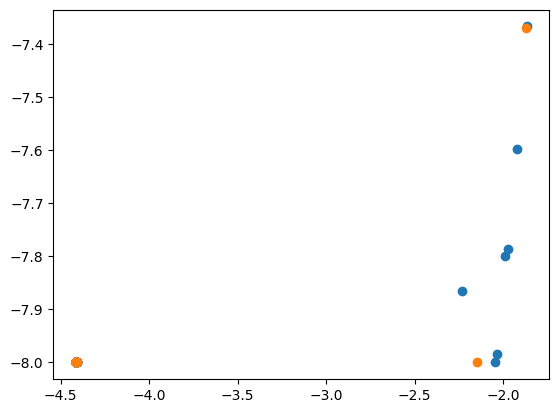

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 9.50874  validloss 9.88264±0.00000  bestvalidloss 9.88264  last_update 0
train: iter 1  trainloss 8.64452  validloss 8.97257±0.00000  bestvalidloss 8.97257  last_update 0
train: iter 2  trainloss 7.91501  validloss 8.17674±0.00000  bestvalidloss 8.17674  last_update 0
train: iter 3  trainloss 7.31328  validloss 7.50351±0.00000  bestvalidloss 7.50351  last_update 0
train: iter 4  trainloss 6.76160  validloss 6.93462±0.00000  bestvalidloss 6.93462  last_update 0
train: iter 5  trainloss 6.28988  validloss 6.45690±0.00000  bestvalidloss 6.45690  last_update 0
train: iter 6  trainloss 5.86877  validloss 5.99887±0.00000  bestvalidloss 5.99887  last_update 0
train: iter 7  trainloss 5.52006  validloss 5.63480±0.00000  bestvalidloss 5.63480  last_update 0
train: iter 8  trainloss 5.19614  validloss 5.29598±0.00000  bestvalidloss 5.29598  last_update 0
train: iter 9  trainloss 4.91120  validloss 5.00922±0.00000  bestvalidloss 5.00922  last_update 0
train: iter 10  trai

train: iter 84  trainloss 1.21545  validloss 1.24735±0.00000  bestvalidloss 1.24735  last_update 0
train: iter 85  trainloss 1.20050  validloss 1.22227±0.00000  bestvalidloss 1.22227  last_update 0
train: iter 86  trainloss 1.18128  validloss 1.20972±0.00000  bestvalidloss 1.20972  last_update 0
train: iter 87  trainloss 1.16730  validloss 1.20130±0.00000  bestvalidloss 1.20130  last_update 0
train: iter 88  trainloss 1.15351  validloss 1.18827±0.00000  bestvalidloss 1.18827  last_update 0
train: iter 89  trainloss 1.13682  validloss 1.17535±0.00000  bestvalidloss 1.17535  last_update 0
train: iter 90  trainloss 1.13010  validloss 1.15965±0.00000  bestvalidloss 1.15965  last_update 0
train: iter 91  trainloss 1.12113  validloss 1.15222±0.00000  bestvalidloss 1.15222  last_update 0
train: iter 92  trainloss 1.11354  validloss 1.14363±0.00000  bestvalidloss 1.14363  last_update 0
train: iter 93  trainloss 1.09891  validloss 1.13981±0.00000  bestvalidloss 1.13981  last_update 0
train: ite

train: iter 176  trainloss 1.03163  validloss 1.10376±0.00000  bestvalidloss 1.08349  last_update 3
train: iter 177  trainloss 1.03593  validloss 1.09061±0.00000  bestvalidloss 1.08349  last_update 4
train: iter 178  trainloss 1.03294  validloss 1.10363±0.00000  bestvalidloss 1.08349  last_update 5
train: iter 179  trainloss 1.03658  validloss 1.10119±0.00000  bestvalidloss 1.08349  last_update 6
train: iter 180  trainloss 1.03972  validloss 1.09201±0.00000  bestvalidloss 1.08349  last_update 7
train: iter 181  trainloss 1.03063  validloss 1.09428±0.00000  bestvalidloss 1.08349  last_update 8
train: iter 182  trainloss 1.03227  validloss 1.09315±0.00000  bestvalidloss 1.08349  last_update 9
train: iter 183  trainloss 1.02474  validloss 1.10032±0.00000  bestvalidloss 1.08349  last_update 10
train: iter 184  trainloss 1.02612  validloss 1.09753±0.00000  bestvalidloss 1.08349  last_update 11
train: iter 185  trainloss 1.03729  validloss 1.11132±0.00000  bestvalidloss 1.08349  last_update 

train: iter 258  trainloss 1.03543  validloss 1.09235±0.00000  bestvalidloss 1.08349  last_update 85
train: iter 259  trainloss 1.03250  validloss 1.08909±0.00000  bestvalidloss 1.08349  last_update 86
train: iter 260  trainloss 1.03279  validloss 1.09725±0.00000  bestvalidloss 1.08349  last_update 87
train: iter 261  trainloss 1.04020  validloss 1.10452±0.00000  bestvalidloss 1.08349  last_update 88
train: iter 262  trainloss 1.03729  validloss 1.10221±0.00000  bestvalidloss 1.08349  last_update 89
train: iter 263  trainloss 1.03618  validloss 1.09529±0.00000  bestvalidloss 1.08349  last_update 90
train: iter 264  trainloss 1.03602  validloss 1.09782±0.00000  bestvalidloss 1.08349  last_update 91
train: iter 265  trainloss 1.03790  validloss 1.08997±0.00000  bestvalidloss 1.08349  last_update 92
train: iter 266  trainloss 1.03626  validloss 1.10117±0.00000  bestvalidloss 1.08349  last_update 93
train: iter 267  trainloss 1.03488  validloss 1.10746±0.00000  bestvalidloss 1.08349  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-4.2038, -0.7295], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 17.17757  validloss 19.91330±0.00000  bestvalidloss 19.91330  last_update 0
train: iter 1  trainloss 9.61374  validloss 13.47227±0.00000  bestvalidloss 13.47227  last_update 0
train: iter 2  trainloss 5.16647  validloss 7.03325±0.00000  bestvalidloss 7.03325  last_update 0
train: iter 3  trainloss 3.57218  validloss 5.10147±0.00000  bestvalidloss 5.10147  last_update 0
train: iter 4  trainloss 2.98676  validloss 4.28872±0.00000  bestvalidloss 4.28872  last_update 0
train: iter 5  trainloss 2.72255  validloss 4.23471±0.00000  bestvalidloss 4.23471  last_update 0
train: iter 6  trainloss 2.57002  validloss 4.01866±0.00000  bestvalidloss 4.01866  last_update 0
train: iter 7  trainloss 2.45661  validloss 3.92671±0.00000  bestvalidloss 3.92671  last_update 0
train: iter 8  trainloss 2.35852  validloss 3.80583±0.00000  bestvalidloss 3.80583  last_update 0
train: iter 9  trainloss 2.28298  validloss 3.81504±0.00000  bestvalidloss 3.80583  last_update 1
train: iter 10 

train: iter 83  trainloss 1.37240  validloss 2.41051±0.00000  bestvalidloss 2.19260  last_update 53
train: iter 84  trainloss 1.40646  validloss 2.38882±0.00000  bestvalidloss 2.19260  last_update 54
train: iter 85  trainloss 1.35890  validloss 2.25799±0.00000  bestvalidloss 2.19260  last_update 55
train: iter 86  trainloss 1.35994  validloss 2.38460±0.00000  bestvalidloss 2.19260  last_update 56
train: iter 87  trainloss 1.35566  validloss 2.19134±0.00000  bestvalidloss 2.19134  last_update 0
train: iter 88  trainloss 1.34743  validloss 2.36881±0.00000  bestvalidloss 2.19134  last_update 1
train: iter 89  trainloss 1.37789  validloss 2.37941±0.00000  bestvalidloss 2.19134  last_update 2
train: iter 90  trainloss 1.36079  validloss 2.44479±0.00000  bestvalidloss 2.19134  last_update 3
train: iter 91  trainloss 1.36767  validloss 2.26227±0.00000  bestvalidloss 2.19134  last_update 4
train: iter 92  trainloss 1.35330  validloss 2.22031±0.00000  bestvalidloss 2.19134  last_update 5
train:

train: iter 167  trainloss 1.38227  validloss 2.25005±0.00000  bestvalidloss 2.14012  last_update 67
train: iter 168  trainloss 1.37427  validloss 2.32071±0.00000  bestvalidloss 2.14012  last_update 68
train: iter 169  trainloss 1.36795  validloss 2.22722±0.00000  bestvalidloss 2.14012  last_update 69
train: iter 170  trainloss 1.34130  validloss 2.34170±0.00000  bestvalidloss 2.14012  last_update 70
train: iter 171  trainloss 1.34051  validloss 2.28943±0.00000  bestvalidloss 2.14012  last_update 71
train: iter 172  trainloss 1.32972  validloss 2.24552±0.00000  bestvalidloss 2.14012  last_update 72
train: iter 173  trainloss 1.36687  validloss 2.34180±0.00000  bestvalidloss 2.14012  last_update 73
train: iter 174  trainloss 1.35383  validloss 2.27284±0.00000  bestvalidloss 2.14012  last_update 74
train: iter 175  trainloss 1.37570  validloss 2.27375±0.00000  bestvalidloss 2.14012  last_update 75
train: iter 176  trainloss 1.36343  validloss 2.32789±0.00000  bestvalidloss 2.14012  last_

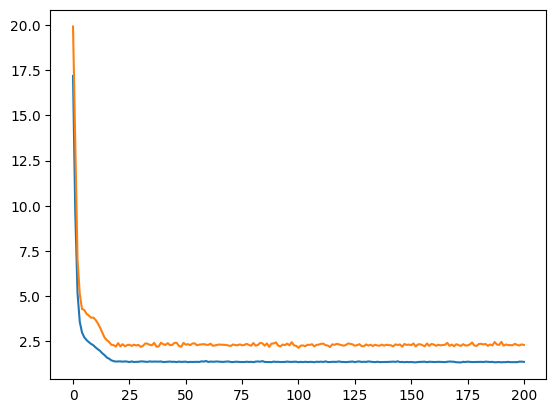

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-4.9334)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-0.9105)


In [21]:
print(vi.h_min_tilde)

-5.8048906


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.2449943681803495
tensor([0.6717])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

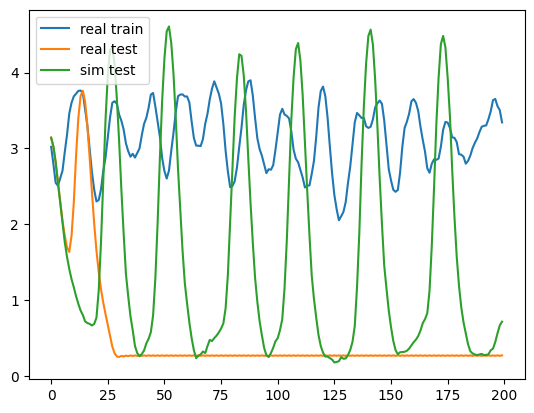

encoder [-4.41387 -8.     ]
initial_belief tensor([-4.2038, -0.7295])
real train tensor([-4.4285, -8.0136])
real test tensor([-2.1718, -7.9802])
sim tensor([-4.4227, -8.0266])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.428571428571429


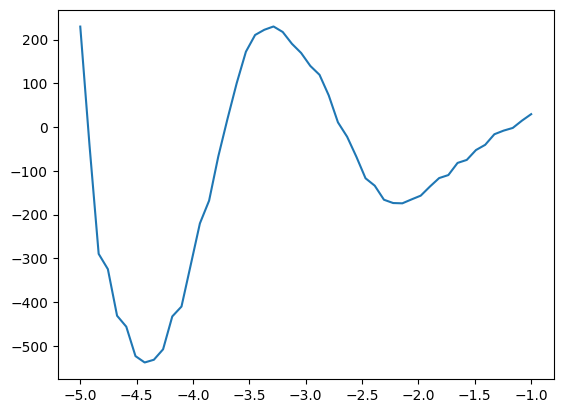

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.6523644395198285
tensor([1.7638])
